<a href="https://colab.research.google.com/github/sanyamja1n/Zomato-Restaurant-Clustering/blob/main/Zomato%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import spacy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px
import re
import string
!pip install contractions
import contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords


from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
meta_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant reviews.csv')

In [ ]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

In [ ]:
reviews_df.shape

(10000, 7)

In [ ]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# Dataset Duplicate Value Count
meta_df.duplicated().sum()

0

In [ ]:
reviews_df.duplicated().sum()

36

In [ ]:
#Dropping Duplicates
reviews_df.drop_duplicates(inplace = True)

In [ ]:
# Missing Values/Null Values Count
meta_df.isnull().sum() # Checking null values

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
#Since more than 50% of the collection column data is missing so we will drop this column
meta_df.drop('Collections', axis = 1, inplace = True)

In [ ]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [ ]:
# Removing the null value
reviews_df.dropna(inplace= True)

In [ ]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
reviews_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,9955,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9955,7442,Ankita,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9955,10,5,3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9955,2477,1 Review,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9955,9775,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,9955.0,NaN,NaN,NaN,0.751984,2.575691,0.0,0.0,0.0,0.0,64.0


In [ ]:
meta_df.describe()

,Name,Links,Cost,Cuisines,Timings
count,105,105,105,105,104
unique,105,105,29,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,6


In [ ]:
# checking for unique values in cost
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# Check Unique Values for each variable.
reviews_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

In [ ]:
reviews_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
meta_df.nunique()

Name        105
Links       105
Cost         29
Cuisines     92
Timings      77
dtype: int64

In [ ]:
# changing the data type of the cost
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
# remove the row with rating 'Like' as only 1 row has this value and then converting rating datatype to float
reviews_df = reviews_df[reviews_df['Rating'] !='Like']
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [ ]:
#Splitting "Metadata" column into reviews and followers column
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
#Converting "Time" column datatype to datetime and then extracting Year, month, day and hour from it
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [ ]:
#checking for null values
reviews_df.isna().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1574
Year             0
Month            0
Day              0
Hour             0
dtype: int64

In [ ]:
# filling the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [ ]:
# Making list of cuisine
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [ ]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending= False)

In [ ]:
cuis_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


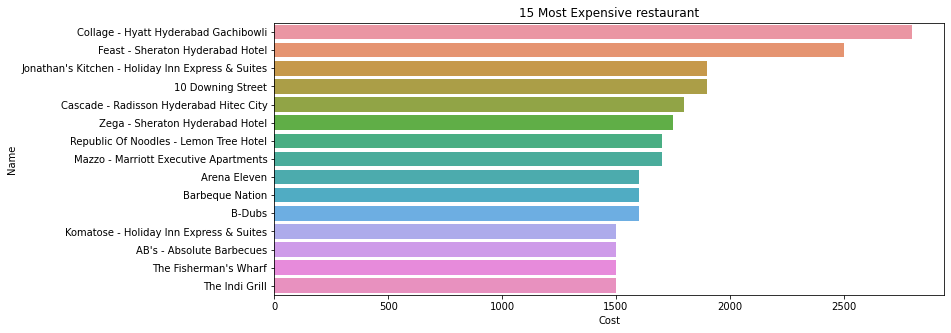

In [ ]:
# checking most expensive
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[:15], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Expensive restaurant')
plt.show()

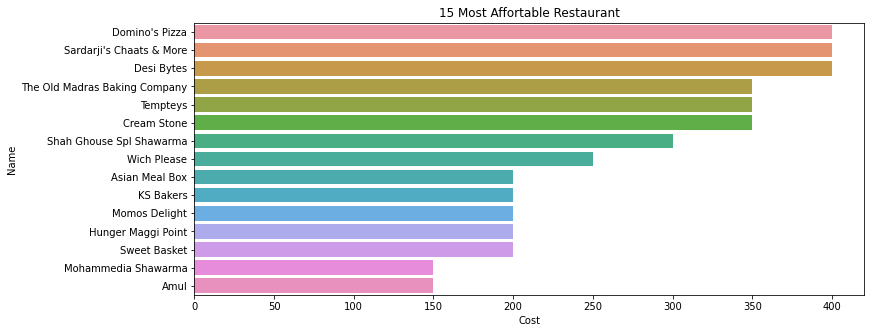

In [ ]:
# checking  most afforatble Resturent
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[-15:], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Affortable Restaurant')
plt.show()

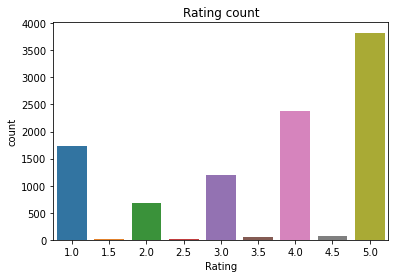

In [ ]:
sns.countplot(reviews_df.Rating)
plt.title('Rating count')
plt.show()

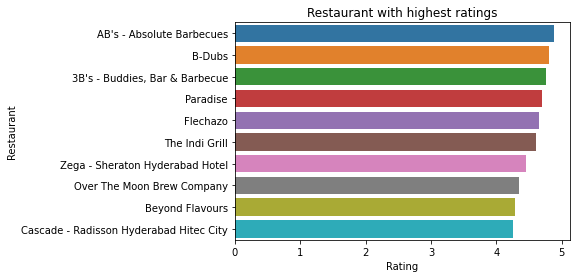

In [ ]:
# Restaurant with highest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[:10],
            y = 'Restaurant', 
            x = 'Rating')
plt.title('Restaurant with highest ratings')
plt.show()

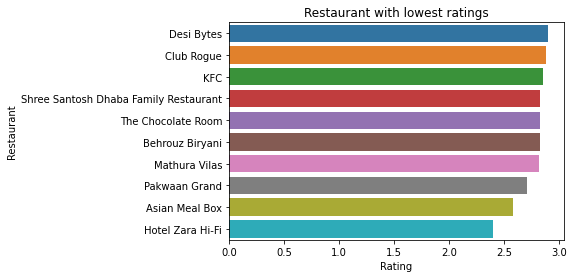

In [ ]:
# Restaurant with lowest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[-10:],
            y = 'Restaurant', x = 'Rating')
plt.title('Restaurant with lowest ratings')
plt.show()

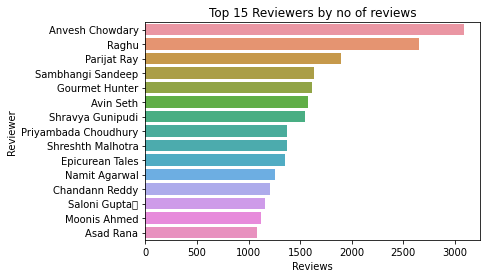

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers':'sum', 'Rating': 'mean'}).reset_index()

# Top 15 reviewers by review count
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')
plt.show()


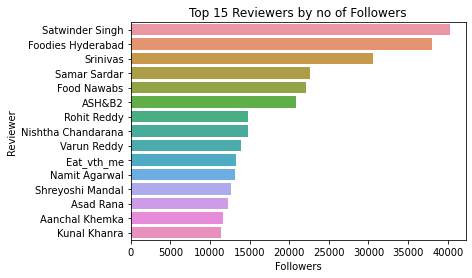

In [ ]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')
plt.show()

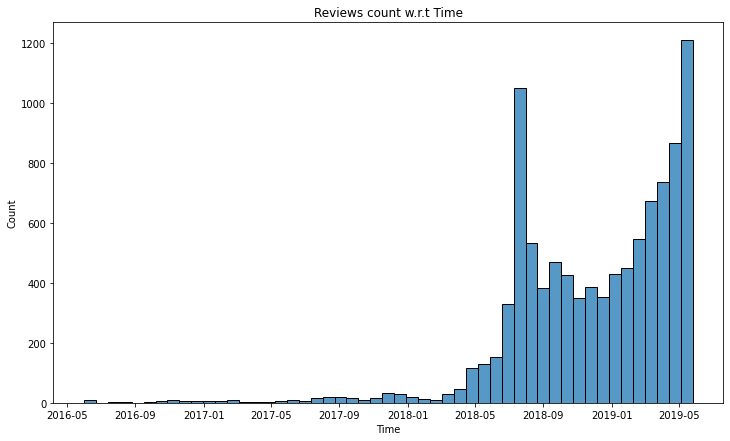

In [ ]:
# Hist plot on Time columns
plt.figure(figsize = (12,7))
sns.histplot(reviews_df.Time)
plt.title('Reviews count w.r.t Time')
plt.show()

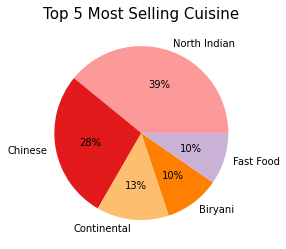

In [ ]:
data = cuis_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:5]

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =15, color= 'black')
plt.show()

In [ ]:
#merging both data frame
meta1 = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta1.merge(reviews_df, on = 'Restaurant')
merged.shape

(9954, 16)

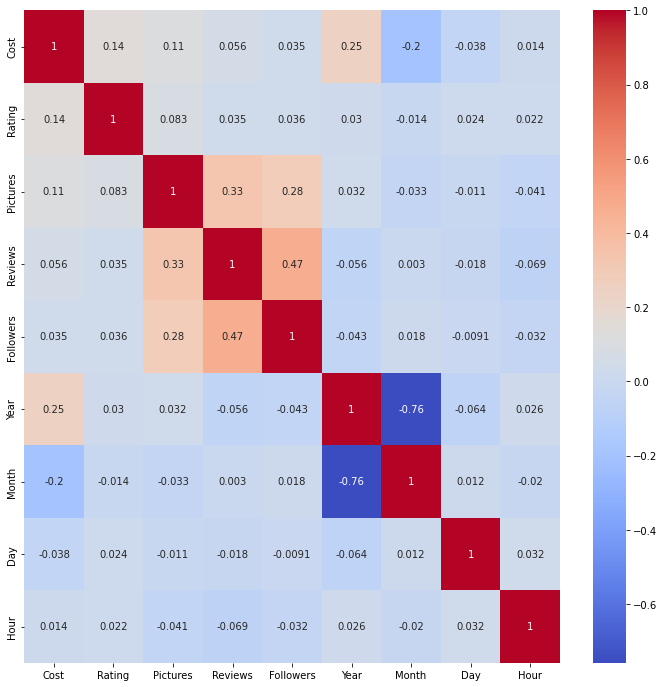

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(merged.corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [ ]:
cuisine_df = meta_df[['Name','Cost','Cuisines']]

In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].apply(lambda x: x.lower())

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


In [ ]:
# function for spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
# Spliting the cuisine and storing in list
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[north indian, chinese, kebab, south indian, e..."
1,Paradise,800,"biryani, north indian, chinese","[north indian, biryani, chinese]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[north indian, desserts, mediterranean, asian]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[seafood, beverages, biryani, chinese, north i..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[asian, mediterranean, chinese, north indian, ..."


In [ ]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
...,...,...,...,...
103,Wich Please,250,fast food,fast food
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",malaysian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",asian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",chinese


In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df["cuisine"].nunique()

44

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,fast food
2,spicy food
3,Healthy food
4,Healthy food
...,...
308,fast food
309,spicy food
310,spicy food
311,fast food


In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)

In [ ]:
dataset.head()

,index,Name,Cost,Cuisines,cuisine
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",fast food
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food


In [ ]:
dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
cuisine= ['cuisine_Dessert',
        'cuisine_Healthy food',
        'cuisine_spicy food',
         'cuisine_fast food']

In [ ]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [ ]:
# Scaling the data
sc = StandardScaler()
cluster_data_sc = sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [-0.81035397, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 0.46989276, -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [ 1.2577369 , -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567,  0.51233992, -0.28787658,  0.26513915],
       [-0.21947087, -0.45323567,  0.51233992,  1.72725951,  0.26513915],
       [-0.51491242, -0.45323567,  1.82442995, -1.29544463,  1.6571197 ],
       [-1.40123708,  2.82881571, -0.79975012, -1.29544463, -1.12684139],
       [-0.71187346, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [ 1.45469793, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567, -0.79975012,  1.72725951,  0.26513915],
       [-1.30275656, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 1.45469793, -0.45323567,  0.51233992, -1.29544463, -1.12684139],
       [-0.31795139, -0.45323567,  1.8

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

In [ ]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

Text(0.5, 1.0, 'Sum of squares elbow plot')

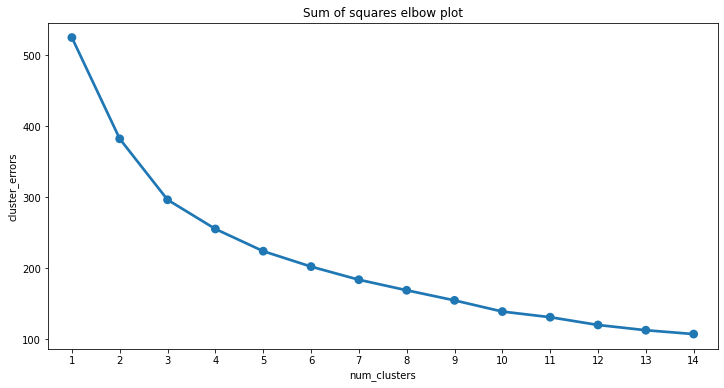

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])
plt.title('Sum of squares elbow plot')

In [ ]:
#finding best cluster by silhouette score
k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

Text(0.5, 1.0, 'Silhouette score')

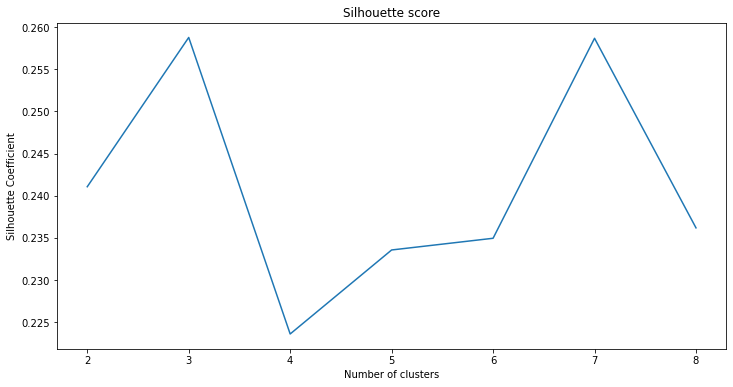

In [ ]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette score')

In [ ]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.24120120672756099
For n_clusters = 3 The average silhouette_score is : 0.2587638827511183
For n_clusters = 4 The average silhouette_score is : 0.25126065468048375
For n_clusters = 5 The average silhouette_score is : 0.241859442111404
For n_clusters = 6 The average silhouette_score is : 0.24759701223570293
For n_clusters = 7 The average silhouette_score is : 0.22841677996800727
For n_clusters = 8 The average silhouette_score is : 0.25070228913073606
For n_clusters = 9 The average silhouette_score is : 0.2649698819588144
For n_clusters = 10 The average silhouette_score is : 0.2789398583929923
For n_clusters = 11 The average silhouette_score is : 0.3019211637792847
For n_clusters = 12 The average silhouette_score is : 0.2806234071844735
For n_clusters = 13 The average silhouette_score is : 0.30594226175313266
For n_clusters = 14 The average silhouette_score is : 0.2894544033964166
For n_clusters = 15 The average silhouette_score is : 

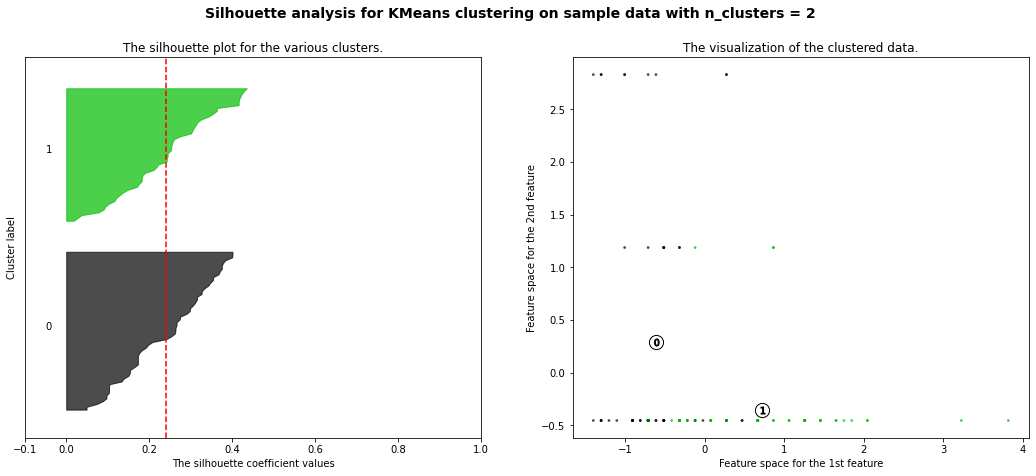

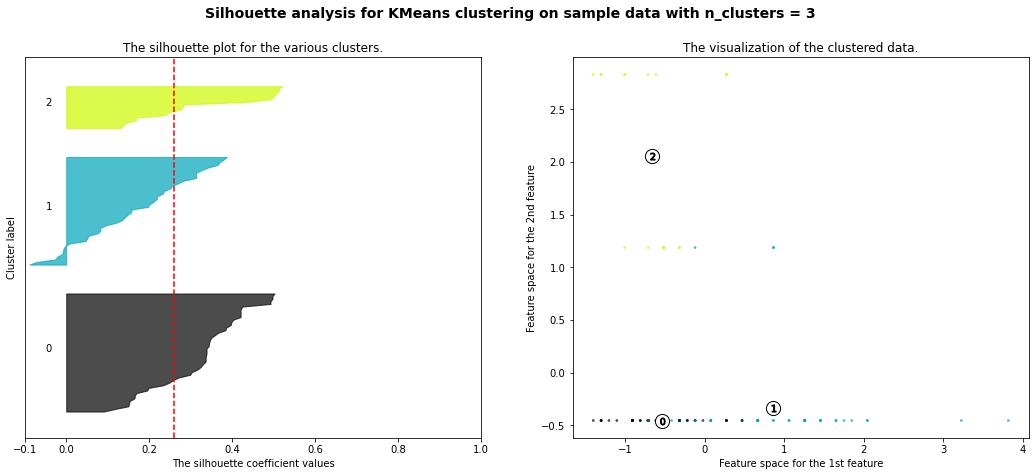

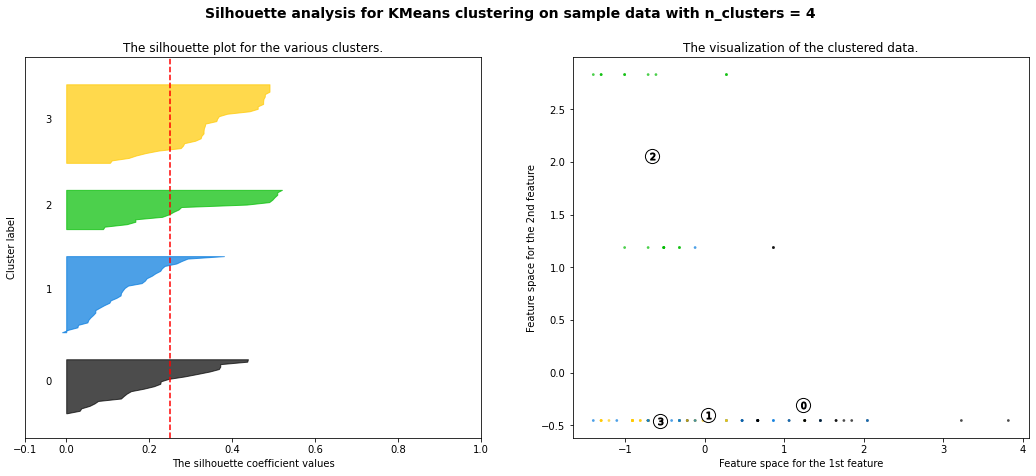

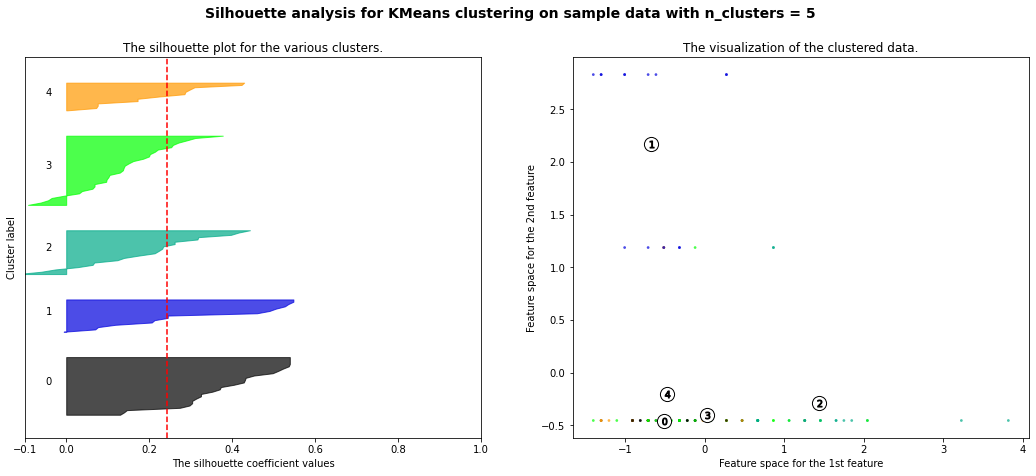

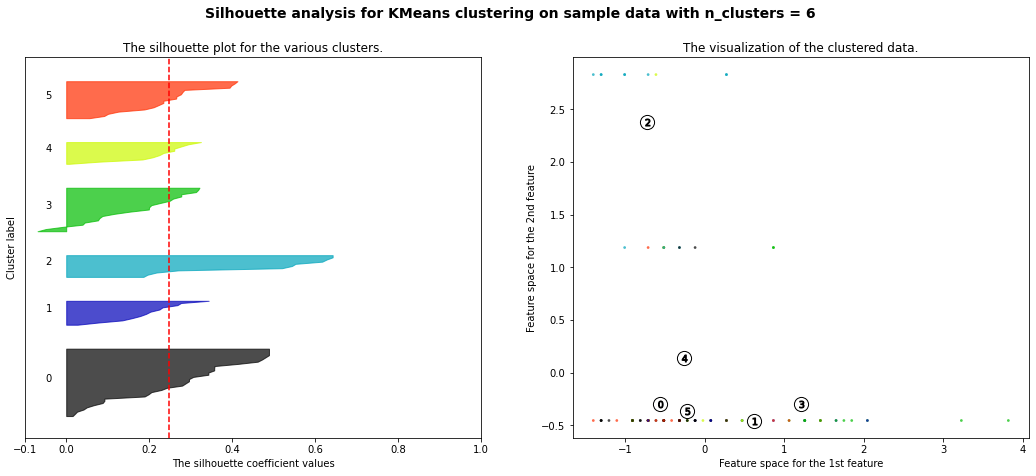

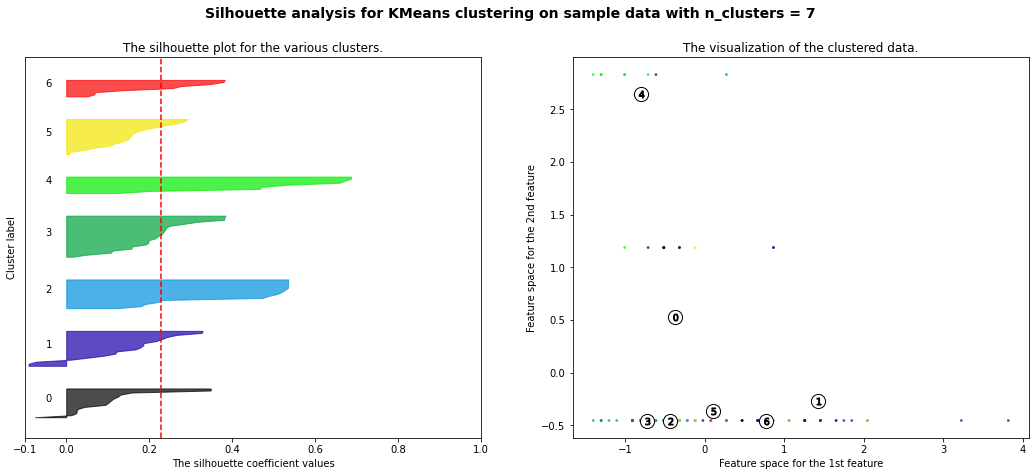

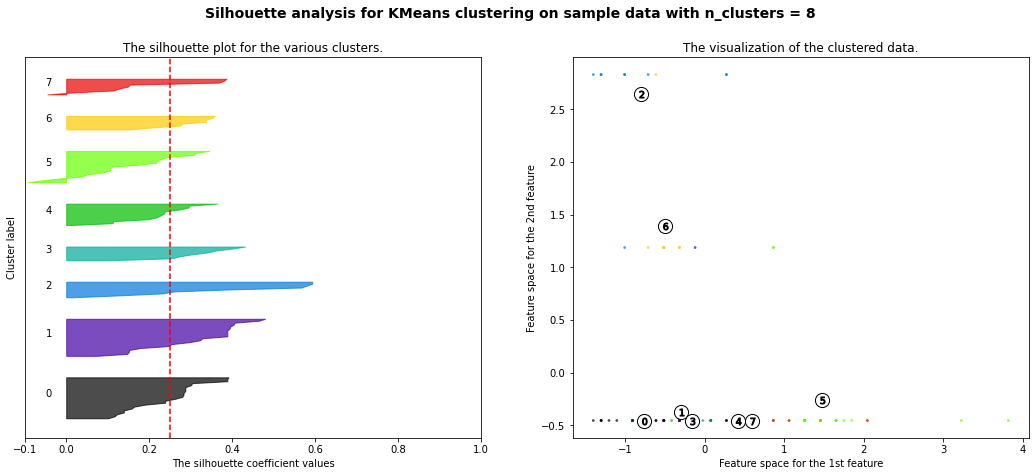

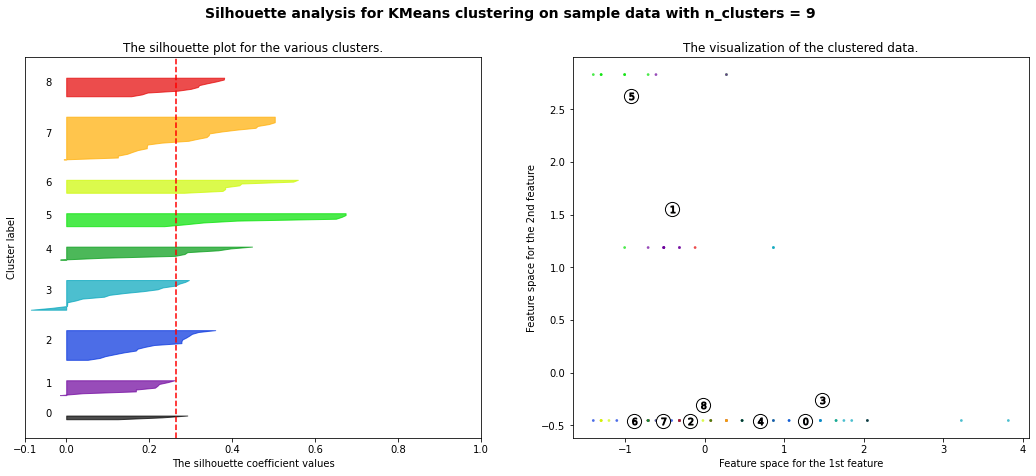

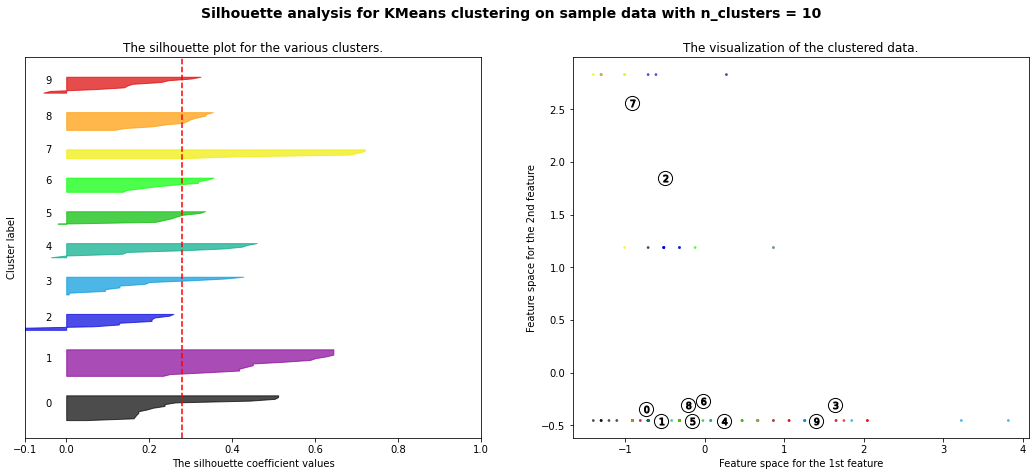

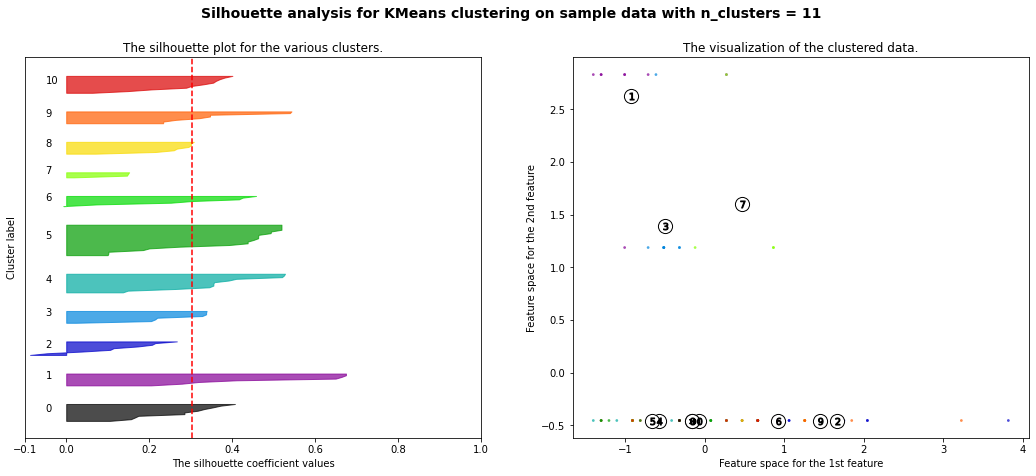

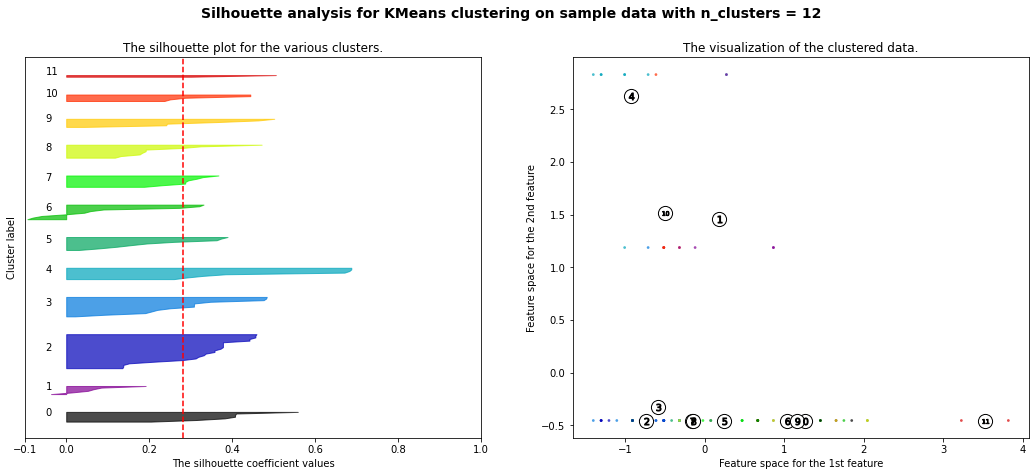

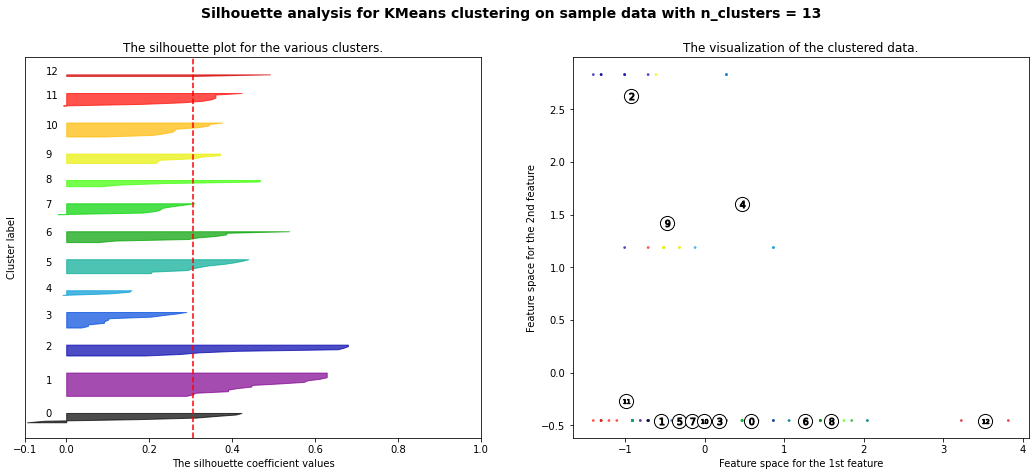

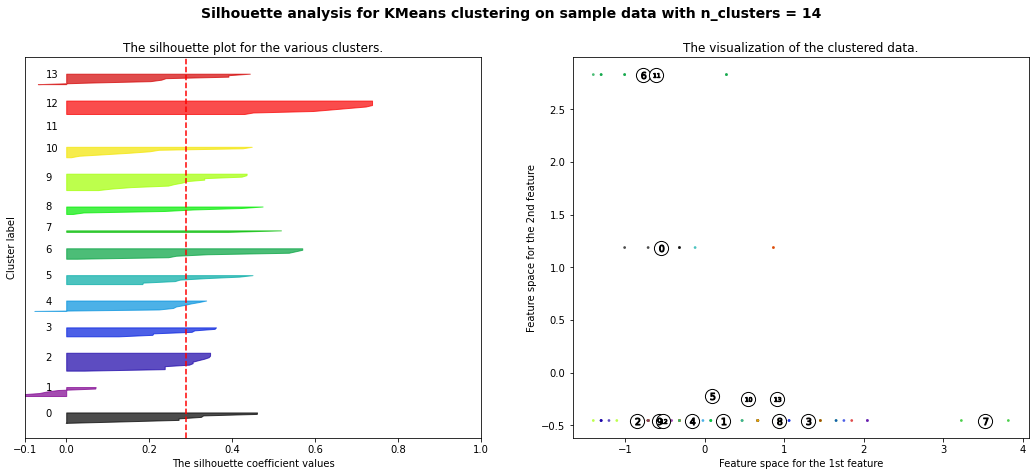

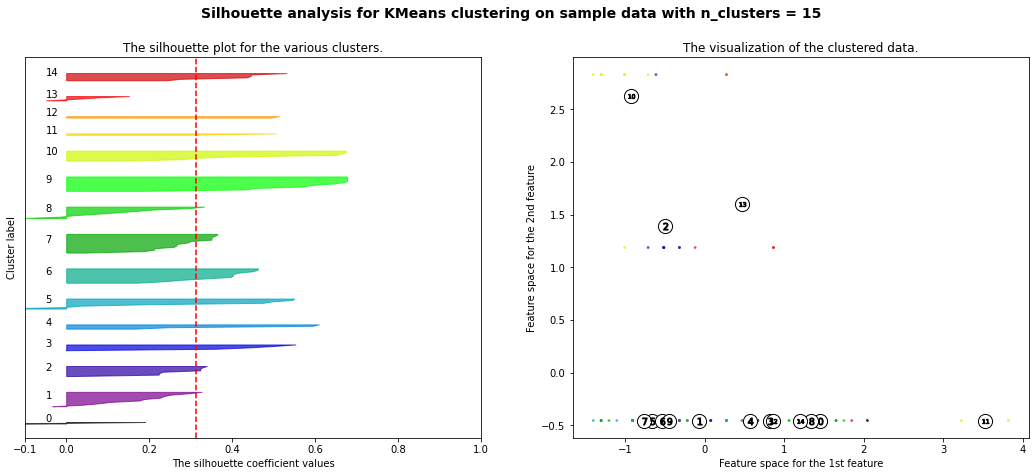

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Finding the predicted values by kmeans
km = KMeans(n_clusters= 3, n_init= 1000, random_state = 1 )
y_predicted = km.fit_predict(cluster_data_sc)

In [ ]:
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [ ]:
cluster_df['cluster']=y_predicted

In [ ]:
cluster_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food,cluster
0,10 Downing Street,1900,"north indian, chinese, continental",0,0,2,1,2
1,13 Dhaba,450,north indian,0,0,1,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",0,2,1,0,2
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",0,2,1,0,2
4,Absolute Sizzlers,750,"continental, american, chinese",0,1,1,1,1
...,...,...,...,...,...,...,...,...
100,Wich Please,250,fast food,0,0,0,1,1
101,Yum Yum Tree - The Arabian Food Court,1200,"north indian, hyderabadi",0,0,2,0,2
102,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",0,0,1,1,2
103,Zing's Northeast Kitchen,550,"north eastern, momos",0,1,0,1,1


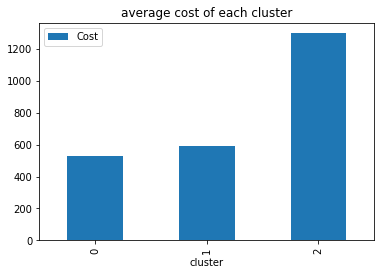

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

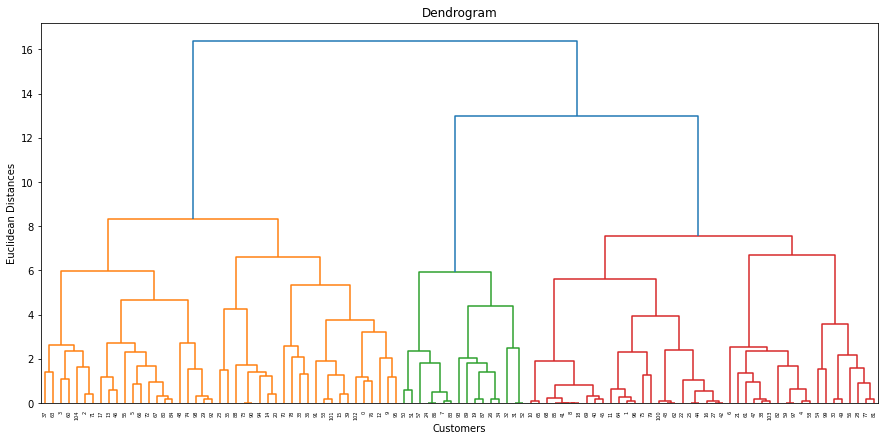

In [ ]:
#Dendogram Plotting
plt.figure(figsize= (15,7))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
#Agglomerative Clustering with no. of clusters = 3
hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(cluster_data_sc)

In [ ]:
cluster_df['cluster_hr']=y_hc

In [ ]:
clustering_result = cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]
clustering_result.head()

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"north indian, chinese, continental",2,0
1,13 Dhaba,450,north indian,1,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",2,0
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",2,0
4,Absolute Sizzlers,750,"continental, american, chinese",1,1


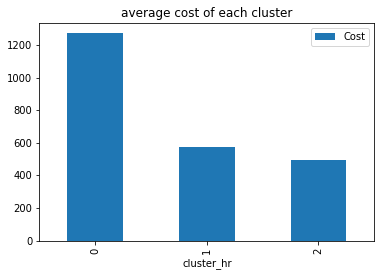

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster_hr')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()